In [30]:
# Manipulating csv file 
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Waring filter 
import warnings
warnings.filterwarnings('ignore')

# Handel temporal data
from datetime import datetime,timedelta

In [31]:
ss_data = pd.read_csv('Superstore_Data_(2015-2018).csv')
print(f"Shape of dataframe {ss_data.shape}")
ss_data.head()

Shape of dataframe (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [32]:
# Finding the category of product that our store deals in

ss_data['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

**There are several Categories in the Superstore sale data, we will start from time series analysis and forcasting fror office supply Sales**

In [33]:
os_Sales = ss_data.loc[ss_data['Category']=='Office Supplies']
print(f'Office sale data shape : {os_Sales.shape}')
os_Sales.head()

Office sale data shape : (6026, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [34]:
print('Starting date:',os_Sales['Order Date'].min())
print('Ending date:',os_Sales['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


In [35]:
# Dropping irrelivant varaiables

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


os_Sales.drop(cols, axis=1, inplace= True)
os_Sales 

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [36]:
### Check out missing values:
os_Sales.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [37]:
os_Sales.head()

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900


In [38]:
os_Sales['Order Date'] = pd.to_datetime(os_Sales['Order Date'])

In [39]:
ds_sorted = os_Sales.sort_values(by='Order Date')

In [40]:
ds_sorted.reset_index()


,index,Order Date,Sales
0,7980,2014-01-03,16.448
1,740,2014-01-04,272.736
2,739,2014-01-04,11.784
3,741,2014-01-04,3.540
4,1759,2014-01-05,19.536
...,...,...,...
6021,5091,2017-12-30,3.024
6022,1297,2017-12-30,20.720
6023,908,2017-12-30,52.776
6024,1296,2017-12-30,13.904


In [41]:
ds_sorted = ds_sorted.set_index('Order Date')

In [42]:
ds_sorted.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536


In [43]:
# Aggrigating office Sales by date

os_agg= ds_sorted.resample('D').sum()
os_agg.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


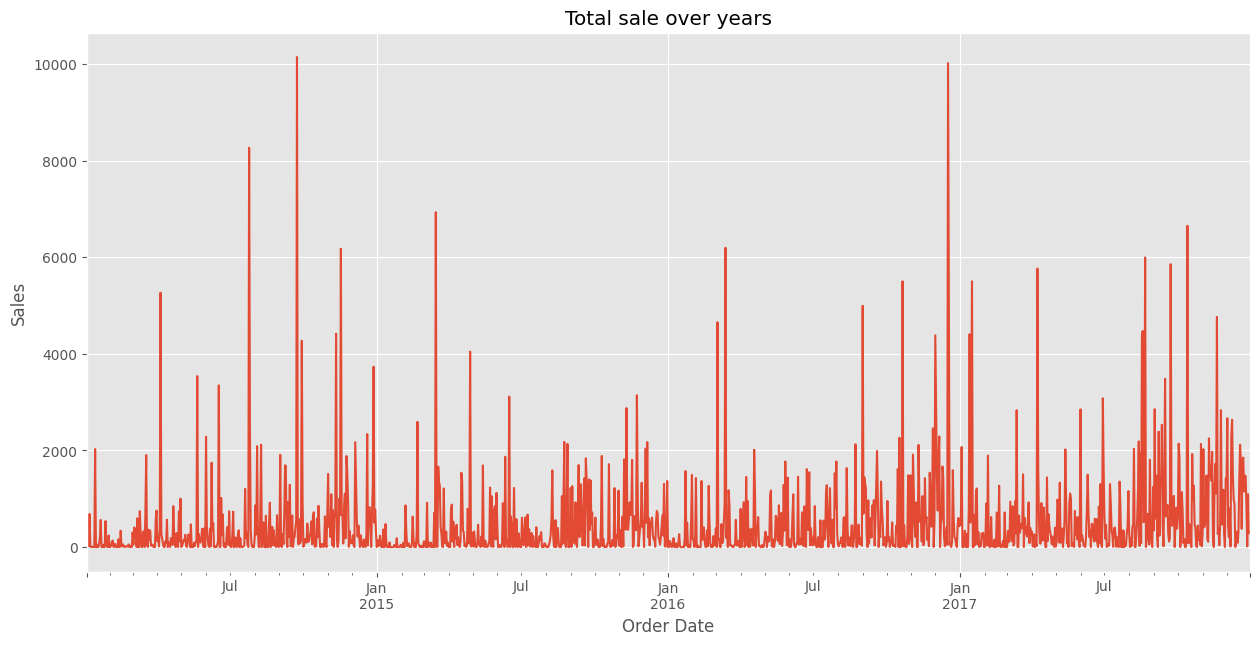

In [44]:
plt.figure(figsize=(15,7))
sns.lineplot
os_agg['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

**The above figure is difficult to interpret so we will sample the data to get some visual interpretability of our data**

In [45]:
# Taking year 2014 and 2015 as sample
viz_sample = os_agg[os_agg.index.year <= 2015]

In [46]:
viz_sample.tail()

,Sales
Order Date,
2015-12-27,1305.924
2015-12-28,24.816
2015-12-29,6.360
2015-12-30,414.900
2015-12-31,1366.584


In [49]:
viz_sample.iloc[365]

Sales    17.424
Name: 2015-01-03 00:00:00, dtype: float64

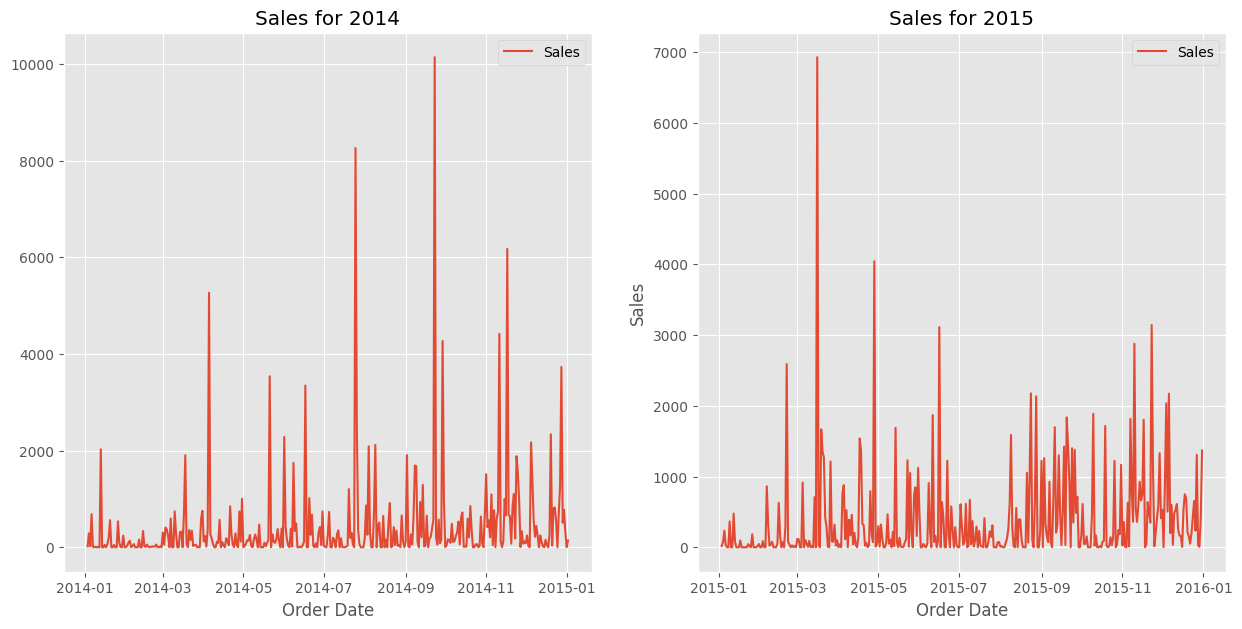

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
sns.lineplot(viz_sample.iloc[:365], ax=ax1)
sns.lineplot(viz_sample.iloc[365:], ax=ax2)
plt.xlabel('Order Date')
plt.ylabel('Sales')
ax1.set_title('Sales for 2014')
ax2.set_title('Sales for 2015')
plt.show()

**We can see recurring spikes in our data but these spikes are random rather than seasonal so our data might be cyclical instead of seasonal**

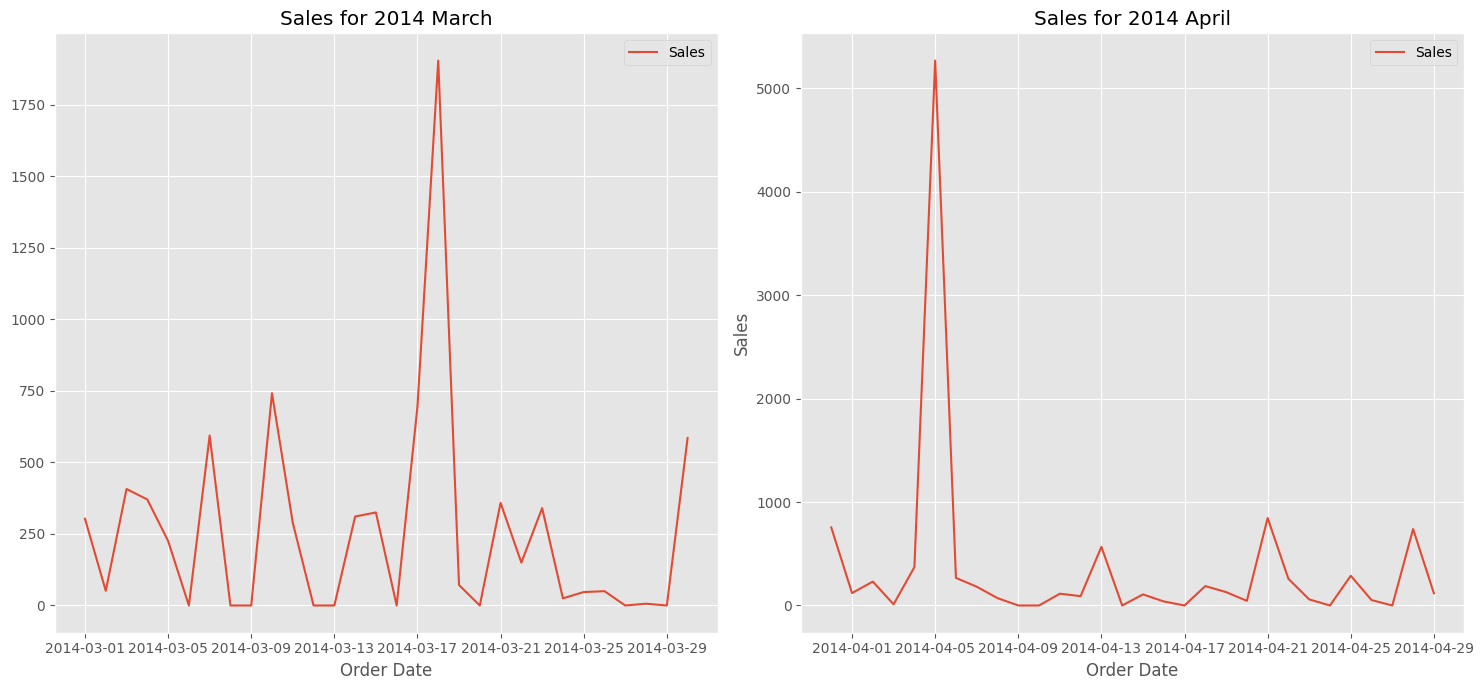

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
sns.lineplot(viz_sample.iloc[57:87], ax=ax1)
sns.lineplot(viz_sample.iloc[87:117], ax=ax2)
plt.xlabel('Order Date')
plt.ylabel('Sales')
ax1.set_title('Sales for 2014 March')
ax2.set_title('Sales for 2014 April')
plt.tight_layout()
plt.show()

There is no specific pattern here as well but a recurring spike is present which suggest a cyclical data

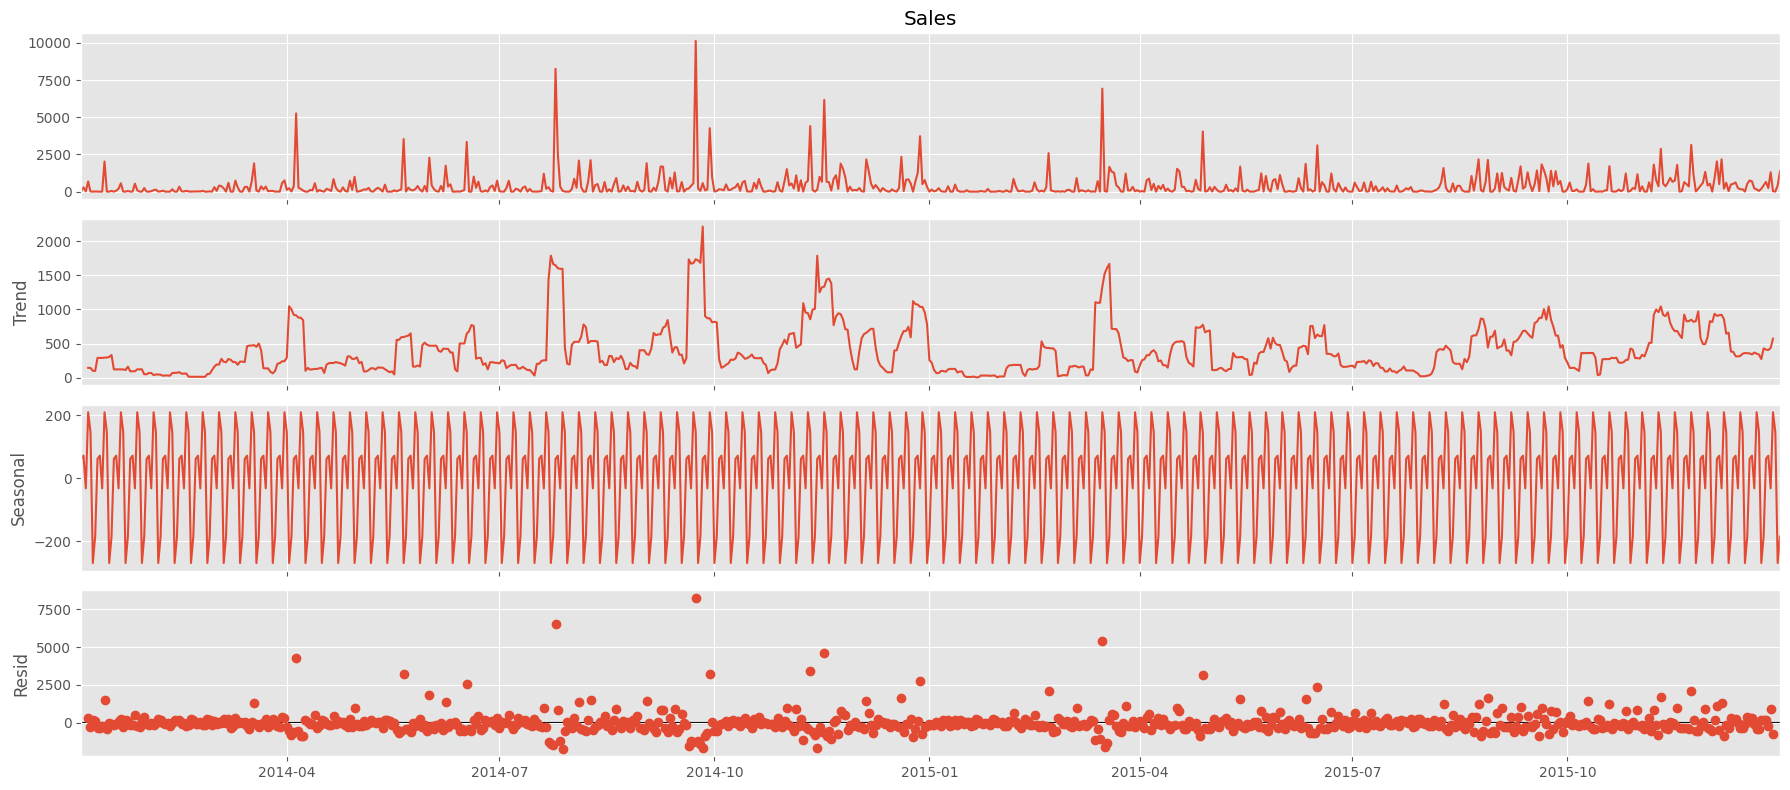

In [51]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(viz_sample['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

# Checking Stationality of dataset with ADF tets

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [54]:
adf_test(os_agg['Sales'])

ADF Statistics: -6.874190503858193
p- value: 1.4890479007431578e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


A satationary data suggests that we do not need to apply any kind of techniques such as diferencing or log transformations to make our data stationary

# Plotting ACF and PACF
**Partial Autocorrelation will help us determine our value for Autoregression (p) and our moving average value (q) for our ARIMA model.** 

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

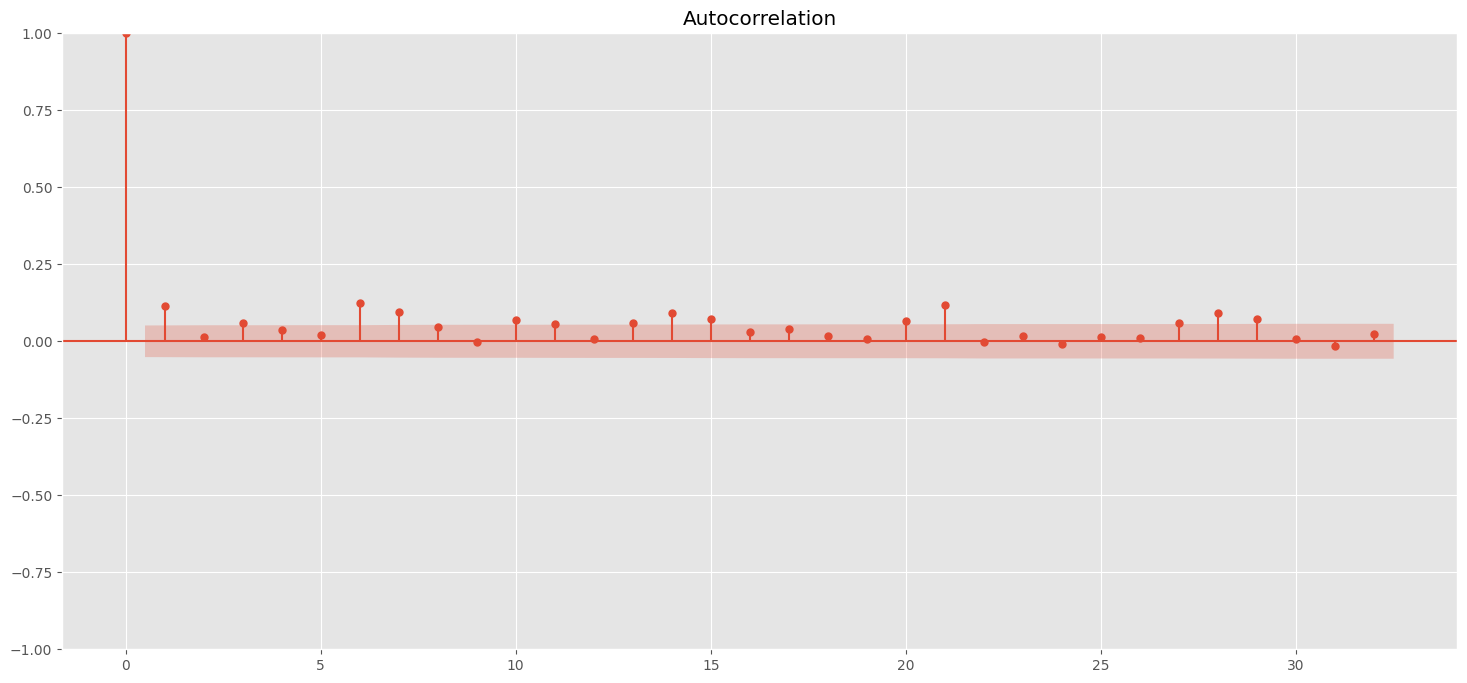

In [58]:
acf = plot_acf(os_agg["Sales"])

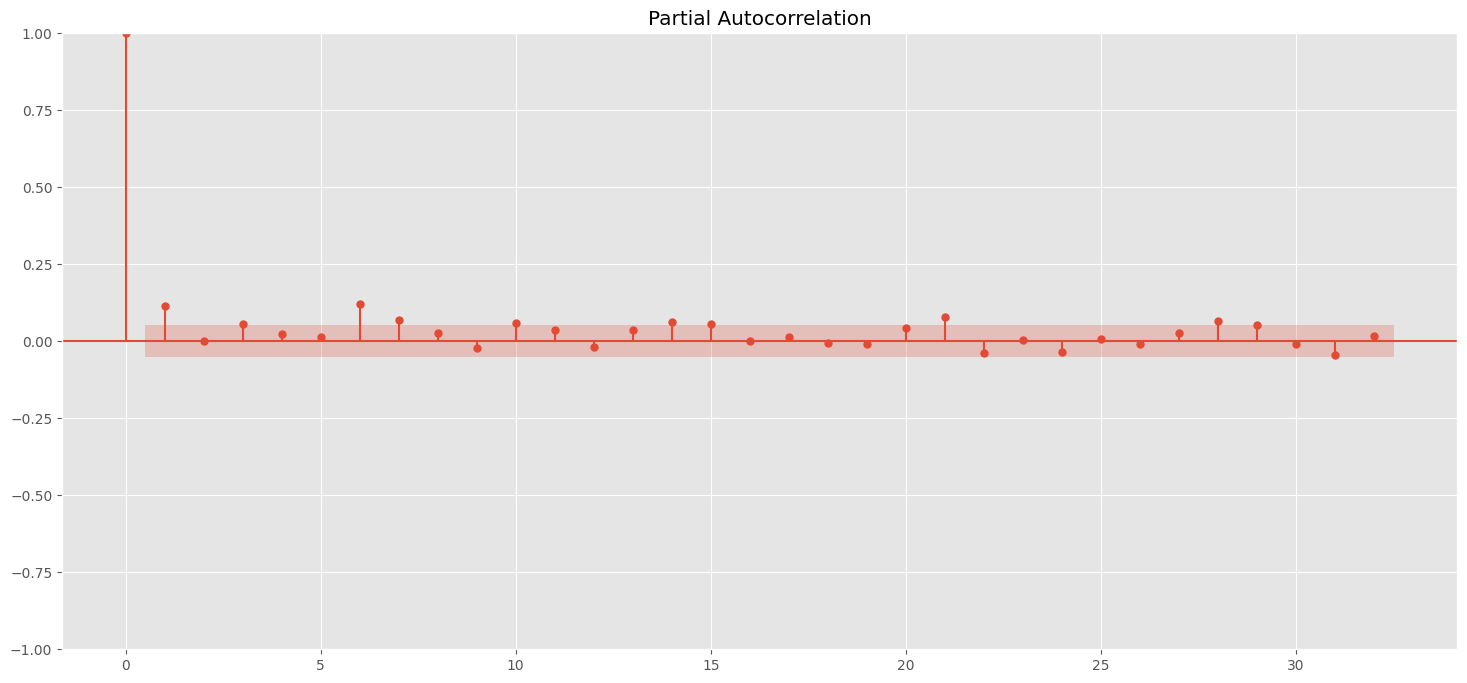

In [59]:
pacf = plot_pacf(os_agg["Sales"])

# Determining train test split 

In [63]:
os_agg.shape

(1458, 1)

In [64]:
1458*0.8

1166.4

In [65]:
train = os_agg[ :1167] # 80%
test = os_agg[1167: ] # 20%

# Running Auto ARIMA to determine the best fit p,d,q for ARIMA

In [66]:
from pmdarima import auto_arima

In [67]:
auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=19144.676, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19151.415, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19139.976, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=19140.661, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19403.327, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=19141.915, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=19141.997, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=19143.936, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19308.853, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.968 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

# ARIMA model

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(2,0,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1167
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9560.854
Date:                Sat, 01 Jun 2024   AIC                          19133.707
Time:                        15:18:58   BIC                          19164.080
Sample:                    01-03-2014   HQIC                         19145.164
                         - 03-14-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.9507     90.628      4.810      0.000     258.323     613.579
ar.L1          0.6409      0.382      1.679      0.093      -0.107       1.389
ar.L2          0.3219      0.363      0.887      0.375      -0.390       1.033
ma.L1         -0.5397      0.378     -1.429      0.153      -1.280       0.201
ma.L2         -0.3850      0.344     -1.119      0.263      -1.059       0.289
sigma2      7.755e+05   1.24e+04     62.637      0.000    7.51e+05       8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             83146.55
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             5.25
Prob(H) (two-sided):                  0.60   Kurtosis:                        43.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
pred= model.predict(start=len(train), end=(len(os_agg)-1),dynamic=True)
pred

2017-03-15    330.087986
2017-03-16    478.860142
2017-03-17    429.378343
2017-03-18    445.549226
2017-03-19    439.986948
                 ...    
2017-12-26    435.952525
2017-12-27    435.952475
2017-12-28    435.952426
2017-12-29    435.952379
2017-12-30    435.952333
Freq: D, Name: predicted_mean, Length: 291, dtype: float64

In [70]:
pred.index = test.index

pred_levels = pd.Series(pred, index=test.index)
pred_levels

test['predictions'] = pred_levels

In [71]:
test

,Sales,predictions
Order Date,,
2017-03-15,0.000,330.087986
2017-03-16,653.341,478.860142
2017-03-17,294.386,429.378343
2017-03-18,379.874,445.549226
2017-03-19,481.154,439.986948
...,...,...
2017-12-26,814.594,435.952525
2017-12-27,13.248,435.952475
2017-12-28,1091.244,435.952426


<Axes: xlabel='Order Date'>

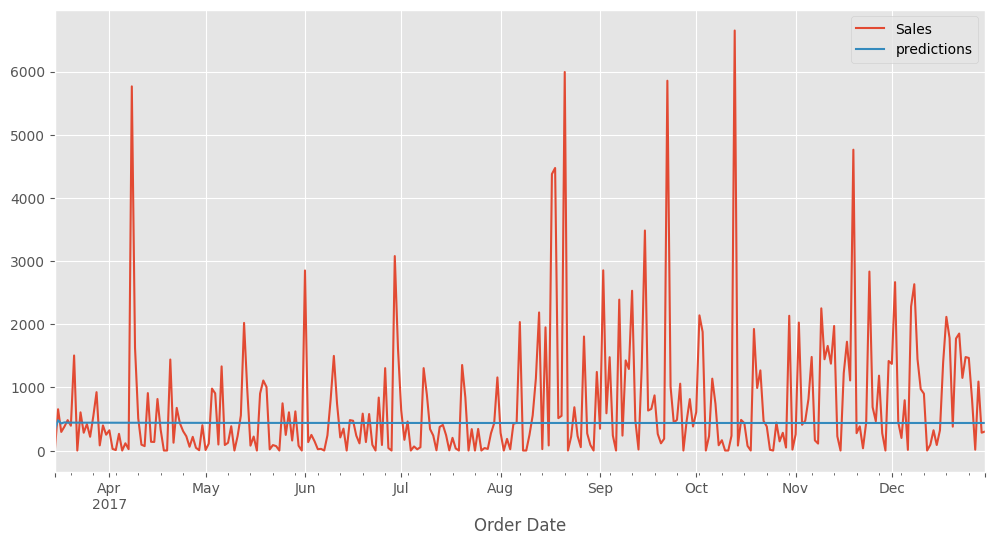

In [72]:
test[['Sales','predictions']].plot(figsize=(12,6))

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE", mean_absolute_error(test['Sales'], test['predictions']))
print("MSE", mean_squared_error(test['Sales'], test['predictions']))
print("RMSE", np.sqrt(mean_squared_error(test['Sales'], test['predictions'])))
r2_bld = r2_score(test['Sales'], test['predictions'])
print("R2 Score", r2_bld)

MAE 607.5565319187614
MSE 1116020.1549710948
RMSE 1056.4185510350974
R2 Score -0.07905991456503725


In [74]:
import statsmodels.api as sm

In [89]:
serimax = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order=(1,1,1,7))
results = serimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35665D+00    |proj g|=  6.61981D-02


 This problem is unconstrained.



At iterate    5    f=  8.29482D+00    |proj g|=  1.69368D-02

At iterate   10    f=  8.28894D+00    |proj g|=  1.00106D-03

At iterate   15    f=  8.28820D+00    |proj g|=  1.00268D-02

At iterate   20    f=  8.28347D+00    |proj g|=  3.83568D-02

At iterate   25    f=  8.14715D+00    |proj g|=  1.64883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   2.518D-05   8.147D+00
  F =   8.1469628329623962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [90]:
test['predictions'] = results.predict(start=len(train), end=(len(os_agg)-1), dynamic=True)


<Axes: xlabel='Order Date'>

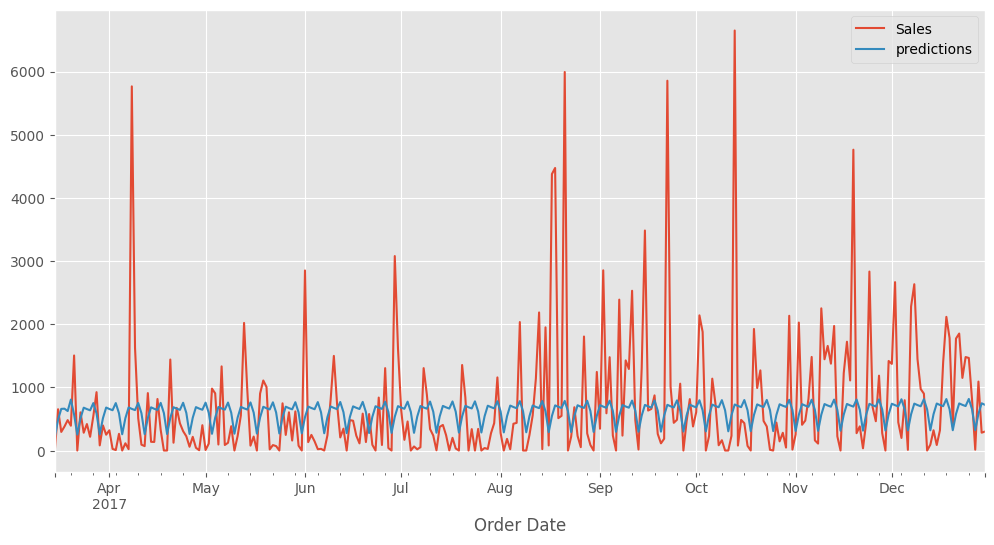

In [91]:
test[['Sales','predictions']].plot(figsize=(12,6))

In [92]:
print("MAE", mean_absolute_error(test['Sales'], test['predictions']))
print("MSE", mean_squared_error(test['Sales'], test['predictions']))
print("RMSE", np.sqrt(mean_squared_error(test['Sales'], test['predictions'])))
r2_bld = r2_score(test['Sales'], test['predictions'])
print("R2 Score", r2_bld)

MAE 614.733185612311
MSE 984795.9387337043
RMSE 992.3688521581602
R2 Score 0.04781843161111232


In [93]:
#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [94]:
os_agg_1 = os_agg['Sales'].copy()

os_reset = os_agg_1.reset_index()
os_reset.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [95]:
os_reset.shape

(1458, 2)

In [96]:
os_reset = os_reset.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [97]:
os_reset[['y']] = os_reset[['y']].apply(pd.to_numeric)
os_reset['ds'] = pd.to_datetime(os_reset['ds'])

In [98]:
os_reset.tail()

,ds,y
1453,2017-12-26,814.594
1454,2017-12-27,13.248
1455,2017-12-28,1091.244
1456,2017-12-29,282.440
1457,2017-12-30,299.724


In [99]:
1457-1166

291

In [100]:
#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date

In [101]:
forecast_start_dt = date(2017,3,14) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2017-03-14


In [102]:
predict_data = os_reset.loc[os_reset['ds']>='2017-03-14']

In [103]:
#PROPHET MODEL

train_set = os_reset[(os_reset['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

15:23:55 - cmdstanpy - INFO - Chain [1] start processing
15:23:56 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future = m.make_future_dataframe(periods = 292)

In [105]:
fcst_prophet_train = m.predict(future)

In [106]:
#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

In [ ]:
#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

In [107]:
eval = predicted_df.copy()

In [108]:
eval.reset_index()
eval.set_index('ds')

,yhat
ds,
2017-03-14,766.323267
2017-03-15,430.638145
2017-03-16,686.599169
2017-03-17,851.359794
2017-03-18,822.337357
...,...
2017-12-26,898.295458
2017-12-27,538.589163
2017-12-28,772.682102


In [109]:
act_val = os_reset.loc[os_reset['ds']>='2017-03-14']

In [110]:
act_new = pd.concat([act_val, eval['yhat']], axis = 1)

In [111]:
act_new = act_new.set_index('ds')

<Axes: xlabel='ds'>

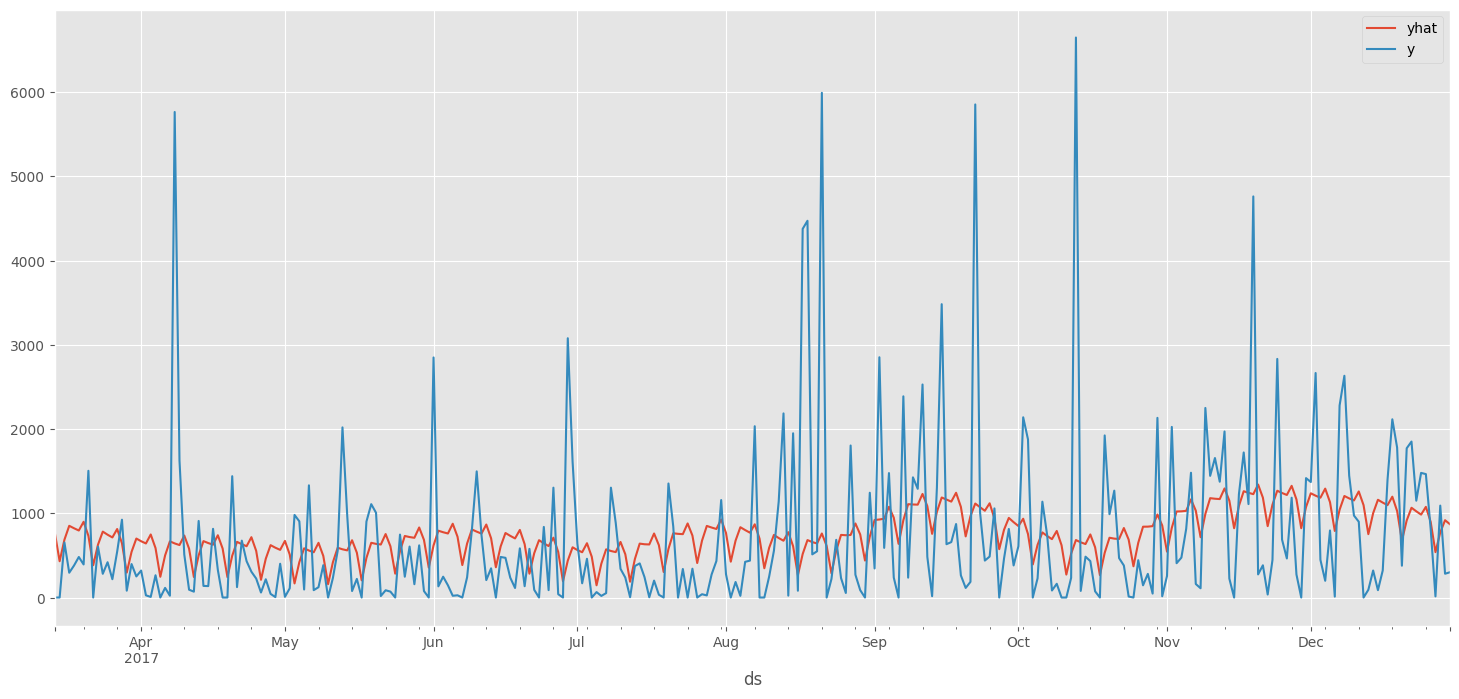

In [112]:
act_new[['yhat','y']].plot()

In [113]:
print("MAE", mean_absolute_error(act_new['y'], act_new['yhat']))
print("MSE", mean_squared_error(act_new['y'], act_new['yhat']))
print("RMSE", np.sqrt(mean_squared_error(act_new['y'], act_new['yhat'])))
r2_bld = r2_score(act_new['y'], act_new['yhat'])
print("R2 Score", r2_bld)

MAE 633.1823987378842
MSE 941970.969532026
RMSE 970.5518891496869
R2 Score 0.087672925934005


# Cross Validation with Prophet

In [118]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='1130 days', period='30 days', horizon = '30 days')

19:18:49 - cmdstanpy - INFO - Chain [1] start processing
19:18:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

19:18:50 - cmdstanpy - INFO - Chain [1] start processing
19:18:50 - cmdstanpy - INFO - Chain [1] done processing


In [115]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days,1.220606e+05,349.371688,348.988927,inf,1.683355,1.000000
1,4 days,7.602415e+04,275.724779,226.523023,inf,1.683355,1.000000
2,5 days,1.063491e+05,326.112074,265.226868,inf,1.639768,1.000000
3,6 days,7.015872e+04,264.874910,181.406968,0.629810,1.047403,1.000000
4,7 days,1.305421e+05,361.306102,321.867446,0.629810,1.017998,1.000000
5,8 days,3.036082e+05,551.006526,455.073041,0.668884,1.046562,1.000000
6,9 days,3.718754e+05,609.815890,578.836538,5.075815,1.450492,1.000000
7,10 days,3.725593e+05,610.376320,579.637577,5.075815,1.479897,1.000000
8,11 days,1.354068e+05,367.976590,329.947004,inf,1.811565,1.000000
9,12 days,1.030644e+05,321.036438,289.614122,inf,1.858559,1.000000


In [120]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
3,2017-02-15,-4.257225,-1034.134759,1106.940576,0.000,2017-02-11,inf,False
7,2017-02-19,420.491400,-665.831127,1474.853910,1269.920,2017-02-11,66.888355,False
29,2017-03-13,973.474209,-167.969347,2041.876844,2833.674,2017-02-11,65.646217,False
4,2017-02-16,264.390183,-740.229228,1328.892677,714.202,2017-02-11,62.981036,False
24,2017-03-08,442.820612,-622.724958,1522.120520,843.100,2017-02-11,47.477095,False
14,2017-02-26,585.373339,-520.833471,1655.996301,715.350,2017-02-11,18.169660,False
21,2017-03-05,769.296312,-357.085616,1796.161607,940.050,2017-02-11,18.164320,False
27,2017-03-11,883.445255,-270.996717,2006.729311,951.494,2017-02-11,7.151779,False
5,2017-02-17,449.516862,-606.689334,1568.106663,359.365,2017-02-11,-25.086434,True
18,2017-03-02,577.889931,-472.135128,1677.564457,331.450,2017-02-11,-74.352069,True


In [121]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
0,2017-02-12,371.654937,-795.394279,1466.152737,0.000,2017-02-11,-inf,True
1,2017-02-13,484.640281,-602.184923,1581.507767,150.940,2017-02-11,-2.210814e+02,True
2,2017-02-14,341.611562,-673.799138,1453.035685,0.000,2017-02-11,-inf,True
3,2017-02-15,-4.257225,-1034.134759,1106.940576,0.000,2017-02-11,inf,False
4,2017-02-16,264.390183,-740.229228,1328.892677,714.202,2017-02-11,6.298104e+01,False
5,2017-02-17,449.516862,-606.689334,1568.106663,359.365,2017-02-11,-2.508643e+01,True
6,2017-02-18,435.458660,-598.430982,1475.688552,9.820,2017-02-11,-4.334406e+03,True
7,2017-02-19,420.491400,-665.831127,1474.853910,1269.920,2017-02-11,6.688836e+01,False
8,2017-02-20,552.352353,-571.619513,1686.770134,90.910,2017-02-11,-5.075815e+02,True
9,2017-02-21,428.041778,-616.349850,1569.504804,0.000,2017-02-11,-inf,True


In [122]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] start pr

In [123]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  879.450654
1                     0.001                     0.10  893.769033
2                     0.001                     1.00  893.615854
3                     0.001                    10.00  894.312356
4                     0.010                     0.01  841.490117
5                     0.010                     0.10  848.264329
6                     0.010                     1.00  848.282671
7                     0.010                    10.00  848.007044
8                     0.100                     0.01  841.495503
9                     0.100                     0.10  851.023247
10                    0.100                     1.00  851.078146
11                    0.100                    10.00  851.213785
12                    0.500                     0.01  845.324225
13                    0.500                     0.10  856.478045
14                    0.5

In [124]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
4,0.010,0.01,841.490117
8,0.100,0.01,841.495503
12,0.500,0.01,845.324225
7,0.010,10.00,848.007044
5,0.010,0.10,848.264329
6,0.010,1.00,848.282671
9,0.100,0.10,851.023247
10,0.100,1.00,851.078146
11,0.100,10.00,851.213785
14,0.500,1.00,856.272772


In [125]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale      0.010000
seasonality_prior_scale      0.010000
rmse                       841.490117
Name: 0, dtype: float64

In [126]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 0.01,
 'rmse': 841.4901167765177}

In [133]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'], 
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'])

In [134]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [135]:
m.fit(train_set)

future = m.make_future_dataframe(periods=292)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]



22:37:19 - cmdstanpy - INFO - Chain [1] start processing
22:37:19 - cmdstanpy - INFO - Chain [1] done processing


inf

In [136]:
df_copy = os_agg.copy()
df_copy.reset_index(inplace=True)
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)
mape(predicted_df['ytrue'], predicted_df['yhat'])

inf